In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [ ]:
# importing the cleaned dataset
df = pd.read_csv('boat_data_clean.csv', na_values={'YearBuilt': 0}, dtype={'BoatTypeGrouped': 'category',
                                                                          'Material': 'category', 'Type': 'category', 'country': 'category'})

In [ ]:
df.head()

In [4]:
# selecting some columns for analysis
df = df[['Type', 'YearBuilt', 'Length', 'Width', 'Material', 'Numberofviewslast7days','Price_cleaned', 'country', 'BoatTypeGrouped' ]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Type                    9882 non-null   category
 1   YearBuilt               9337 non-null   float64 
 2   Length                  9879 non-null   float64 
 3   Width                   9832 non-null   float64 
 4   Material                8139 non-null   category
 5   Numberofviewslast7days  9888 non-null   int64   
 6   Price_cleaned           9888 non-null   float64 
 7   country                 9852 non-null   category
 8   BoatTypeGrouped         9888 non-null   category
dtypes: category(4), float64(4), int64(1)
memory usage: 428.8 KB


In [6]:
df.describe()

,YearBuilt,Length,Width,Numberofviewslast7days,Price_cleaned
count,9337.000000,9879.000000,9832.000000,9888.000000,9.888000e+03
mean,2004.914962,11.570017,3.520124,149.160801,3.034175e+05
std,16.356241,6.002820,1.220534,151.819752,9.737649e+05
min,1885.000000,1.040000,0.010000,13.000000,3.224000e+03
25%,1999.000000,7.470000,2.540000,70.000000,4.297750e+04
50%,2008.000000,10.280000,3.330000,108.000000,9.220550e+04
75%,2018.000000,13.930000,4.250000,172.000000,2.480000e+05
max,2021.000000,100.000000,25.160000,3263.000000,3.100000e+07


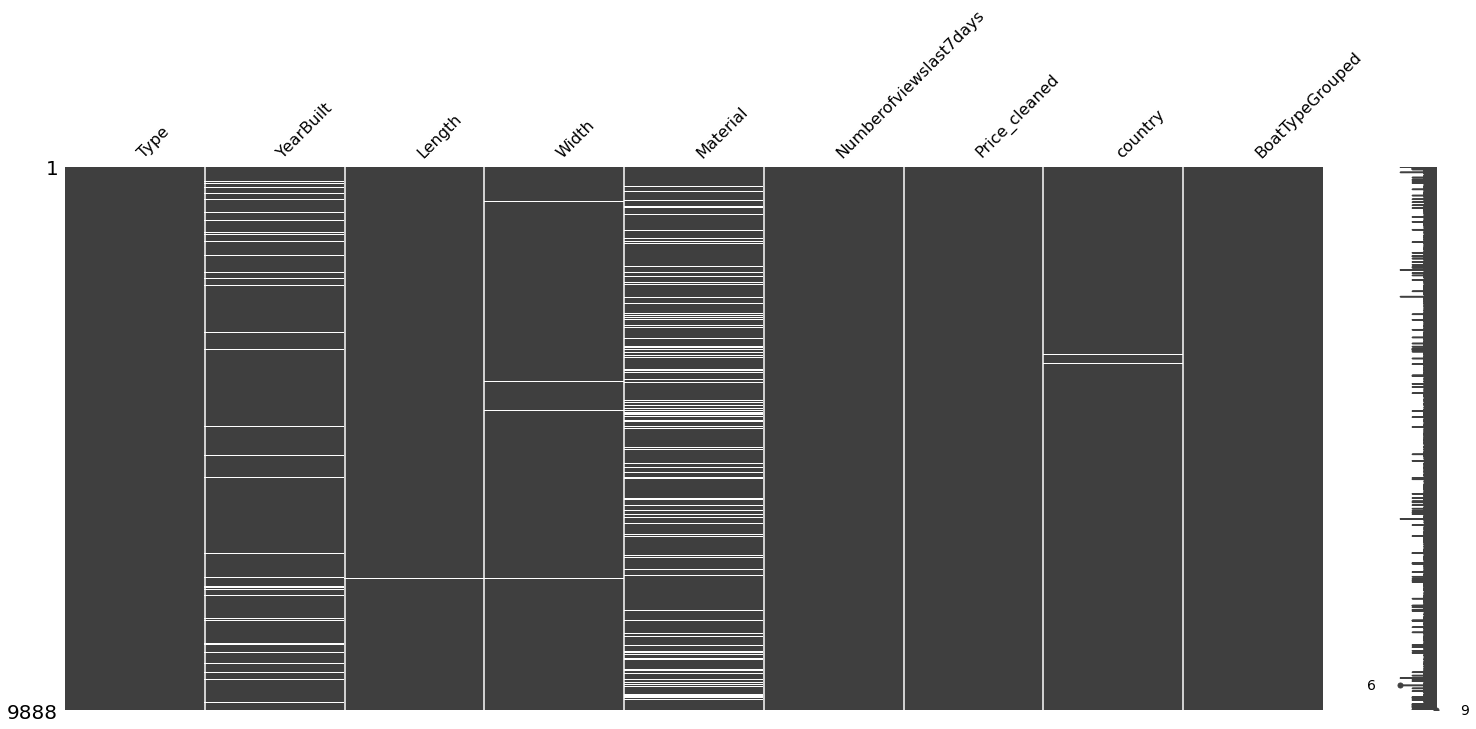

In [7]:
# viewing the missing data in the dataset
missingno.matrix(df)

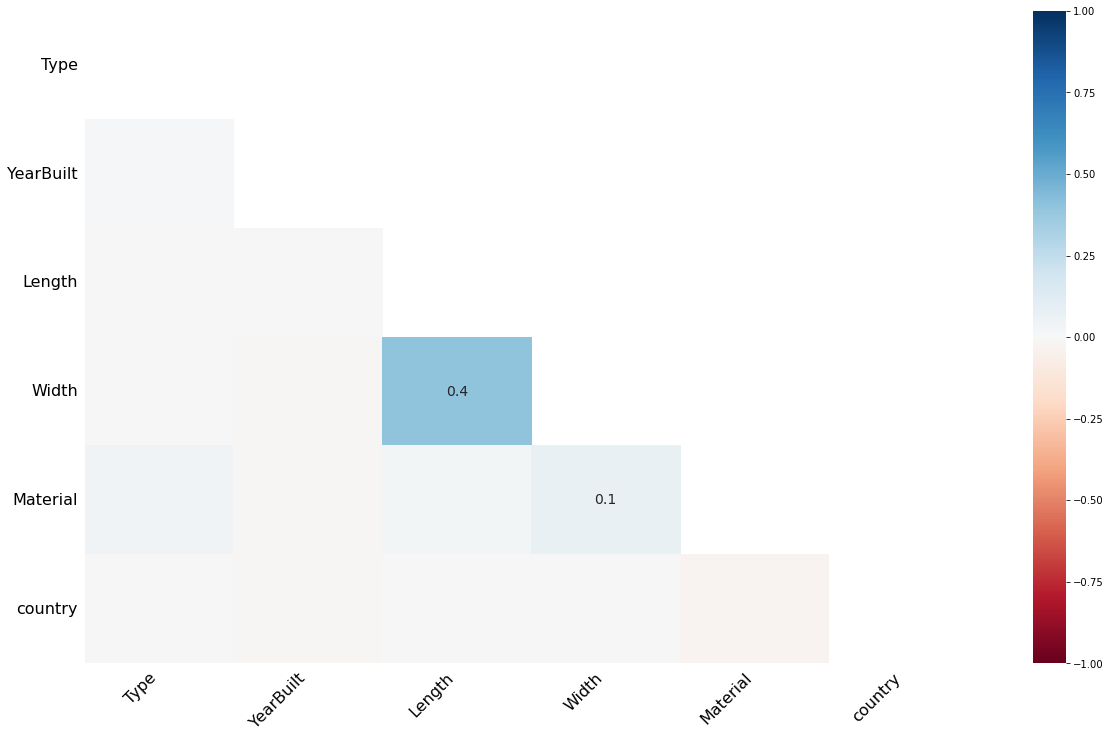

In [8]:
# viewing the correlation between columns with missing values in the dataset
missingno.heatmap(df)

In [9]:
# dropping missing data based of a subset of columns
df = df.dropna(subset=['YearBuilt', 'Length', 'Width', 'Material'])

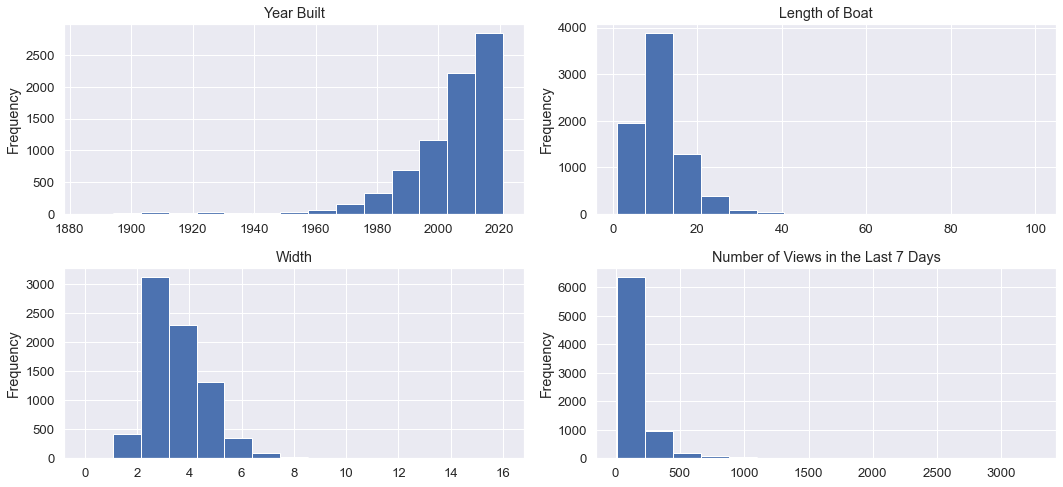

In [10]:
# Histograms of the distribution of numerical columns in the dataset
sns.set(font_scale=1.2)
fig, ax = plt.subplots(2, 2, figsize=(15,7))
df.YearBuilt.plot.hist(bins=15, ax=ax[0][0], title = 'Year Built')
df.Length.plot.hist(bins=15, ax=ax[0][1], title='Length of Boat')
df.Width.plot.hist(bins=15, ax=ax[1][0], title='Width')
df.Numberofviewslast7days.plot.hist(bins=15, title = 'Number of Views in the Last 7 Days')
plt.tight_layout()

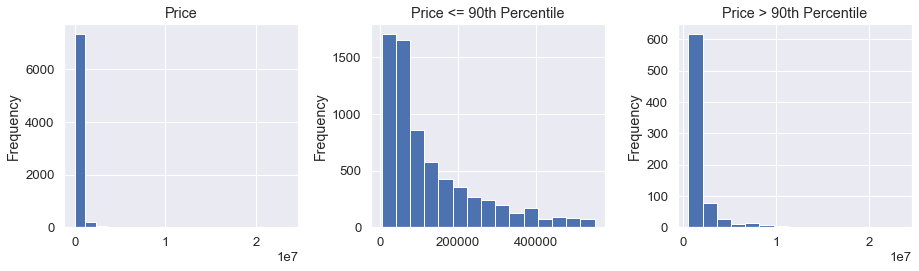

In [11]:
# histograms of the distribution of the price of boats. 
fig, ax = plt.subplots(1,3, figsize=(13, 4))
df.Price_cleaned.plot.hist(bins=20, ax=ax[0], title='Price')
df[df['Price_cleaned'] <= df.Price_cleaned.quantile(0.90)].Price_cleaned.plot.hist(bins=15, ax=ax[1], title='Price <= 90th Percentile')
df[df['Price_cleaned'] > df.Price_cleaned.quantile(0.90)].Price_cleaned.plot.hist(bins=15, ax=ax[2], title = 'Price > 90th Percentile')
plt.tight_layout()

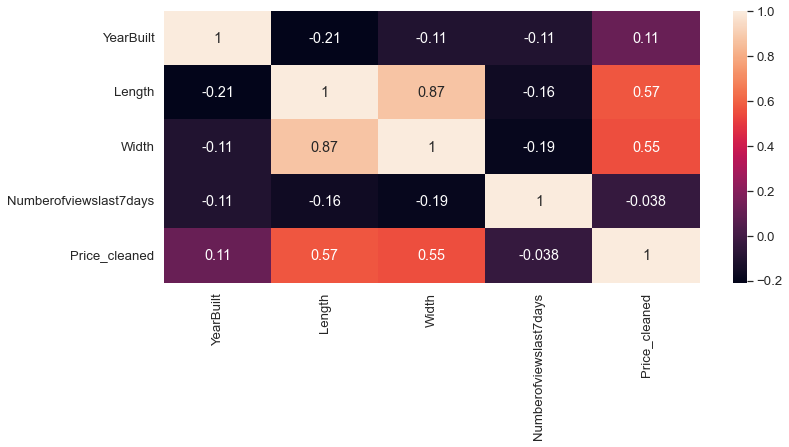

In [12]:
# correlation plot of numerical columns
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)

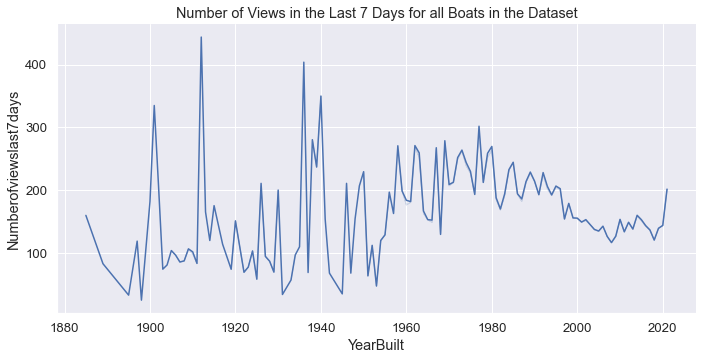

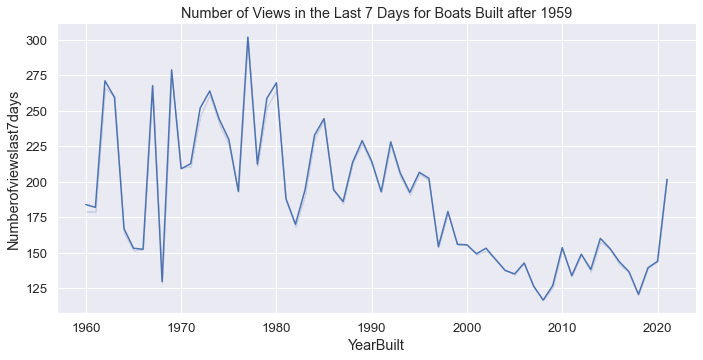

In [13]:
# Number of Views in the last 7 days grouped by year the boats were built.
sns.relplot(x='YearBuilt', y='Numberofviewslast7days', data=df, kind='line', aspect=2, ci=False)
plt.title('Number of Views in the Last 7 Days for all Boats in the Dataset')
sns.relplot(x='YearBuilt', y='Numberofviewslast7days', data=df[df.YearBuilt >= 1960], kind='line', aspect=2, ci=False)
plt.title('Number of Views in the Last 7 Days for Boats Built after 1959')
plt.show()

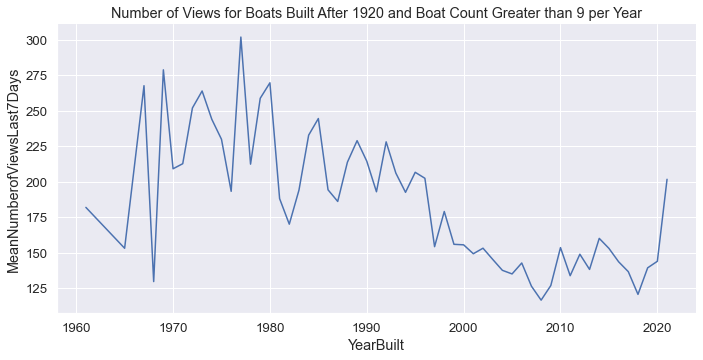

In [14]:
# grouping the boats by the year they were built and filtering for years greater than 1920 and with more than 9 boats
by_year = df.groupby('YearBuilt')['Numberofviewslast7days'].agg(['count', 'mean']).reset_index()
subset_year = by_year[(by_year['count'] >= 10) & (by_year['YearBuilt'] > 1920)]
subset_year.columns=['YearBuilt', 'NumberofBoats', 'MeanNumberofViewsLast7Days']
sns.relplot(x='YearBuilt', y='MeanNumberofViewsLast7Days', data=subset_year, kind='line', aspect=2, ci=False)
plt.title('Number of Views for Boats Built After 1920 and Boat Count Greater than 9 per Year')
plt.show()

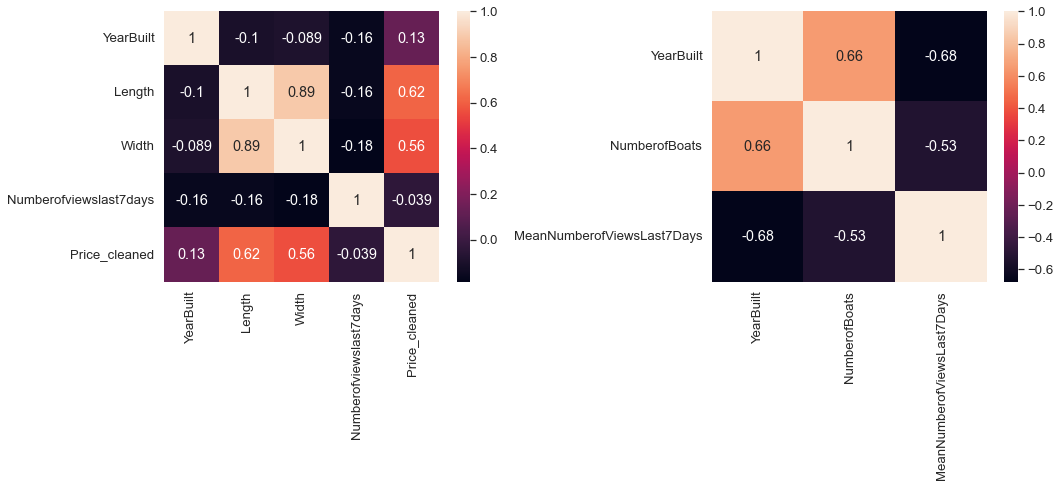

In [15]:
# Side-by-Side comparison of the correlation matrix of the original dataset and the filtered grouped-by-year dataset from the previous cell
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.heatmap(df[df.YearBuilt >= 1960].corr(), annot=True, ax=ax[0])
sns.heatmap(subset_year.corr(), annot=True, ax=ax[1])
plt.tight_layout()

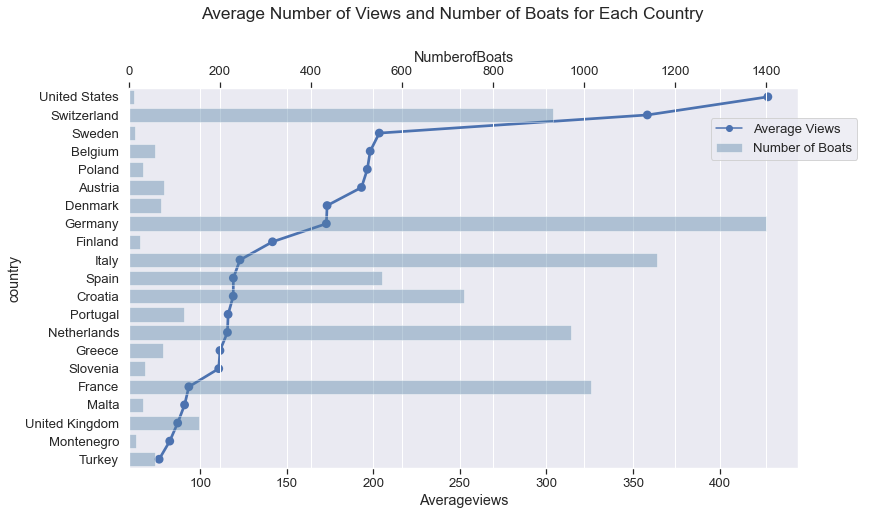

In [16]:
# Number of boats and Number of views in the last 7 days grouped by country 
location = df.groupby('country')['Numberofviewslast7days'].agg(['count', 'mean']).sort_values('mean', ascending=False)
location.columns = ['NumberofBoats', 'Averageviews']
location = location[location.NumberofBoats > 10].reset_index()
order = location['country']
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot()
sns.pointplot(x='Averageviews', y='country', data=location, ax=ax, order=order, label='Average Views')
ax.plot([], [], marker='o', label='Average Views')
ax2 = ax.twiny()
sns.barplot(x='NumberofBoats', y='country', data=location, ax=ax2, order=order, color='steelblue', alpha=0.4, label= 'Number of Boats')
fig.suptitle('Average Number of Views and Number of Boats for Each Country', y=1.04)
fig.legend(bbox_to_anchor = [0.5, 0., 0.5, 0.8])
plt.show()

Text(0.5, 1.0, 'Number of Views in the Last 7 Days Grouped by Material')

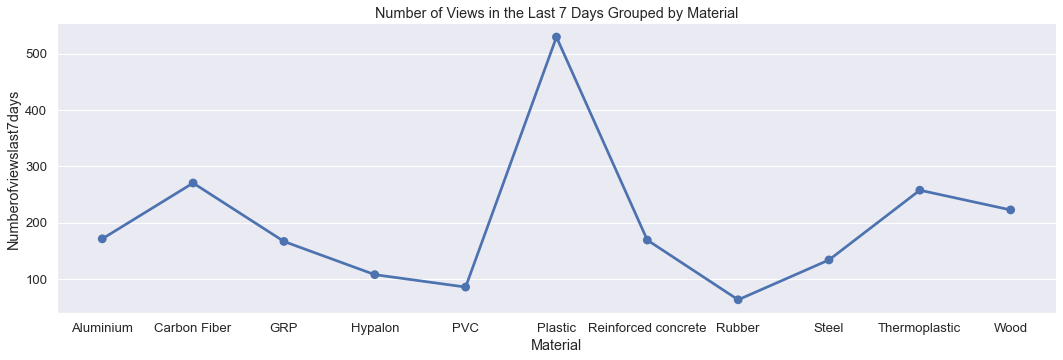

In [24]:
# Number of Views in the last 7 days grouped by the material the boats were made from.
material = df.groupby('Material').Numberofviewslast7days.mean().reset_index().sort_values('Numberofviewslast7days', ascending=False)
sns.catplot(x='Material', y='Numberofviewslast7days', data=df, aspect=3, kind='point', ci=False)
plt.title('Number of Views in the Last 7 Days Grouped by Material')

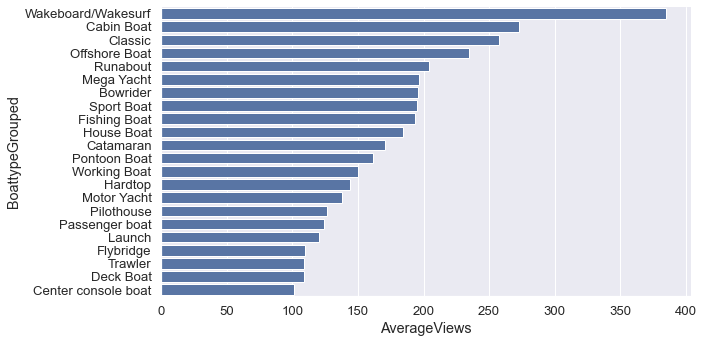

In [21]:
# Number of Views in the last 7 days grouped by boat type
by_boattype = df.groupby('BoatTypeGrouped').Numberofviewslast7days.agg(['count', 'mean']).reset_index().sort_values('mean', ascending=False)
subset_boattype = by_boattype[by_boattype['count'] >= 10]
subset_boattype.columns = ['BoattypeGrouped', 'Number of Boats', 'AverageViews']
sns.catplot(y='BoattypeGrouped', x='AverageViews', data=subset_boattype, kind='bar', ci=None, aspect=2,
            order=list(subset_boattype.BoattypeGrouped), color='b')

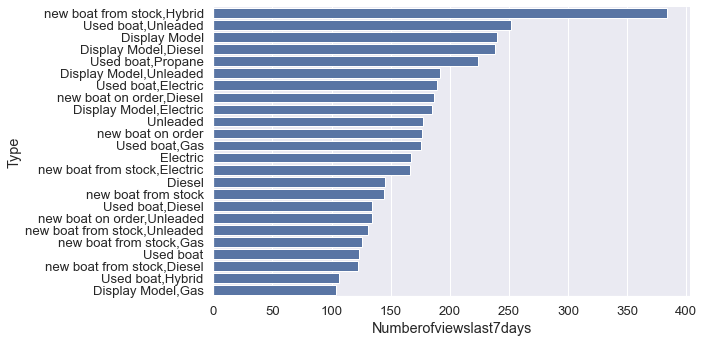

In [18]:
# Number of views in the last 7 days grouped by both boat status and fuel type
type_ = df.groupby('Type').Numberofviewslast7days.mean().reset_index().sort_values('Numberofviewslast7days', ascending=False)
sns.catplot(y='Type', x='Numberofviewslast7days', data = type_, aspect = 2, kind='bar', ci=False, order=list(type_.Type), color='b')

In [19]:
# partitioning the column containing both boat status and fuel type
df = df.merge(df.Type.str.partition(sep=','), left_index=True, right_index=True)
df.rename(columns={0: 'BoatStatus', 2: 'Fuel'}, inplace=True)
df.drop(1, axis=1, inplace=True)
df['Fuel_replaced'] = np.where((df.BoatStatus=='Diesel') & (df.Fuel==''), df.BoatStatus, df.Fuel)
df['Fuel_replaced'] = np.where((df.BoatStatus=='Electric') & (df.Fuel==''), df.BoatStatus, df.Fuel_replaced)
df['Fuel_replaced'] = np.where((df.BoatStatus=='Unleaded') & (df.Fuel==''), df.BoatStatus, df.Fuel_replaced)
df['Fuel_replaced'] = df.Fuel_replaced.replace('', 'Unknown')
df['BoatStatus'] = df.BoatStatus.replace(['Diesel', 'Electric', 'Unleaded'], 'Unknown')

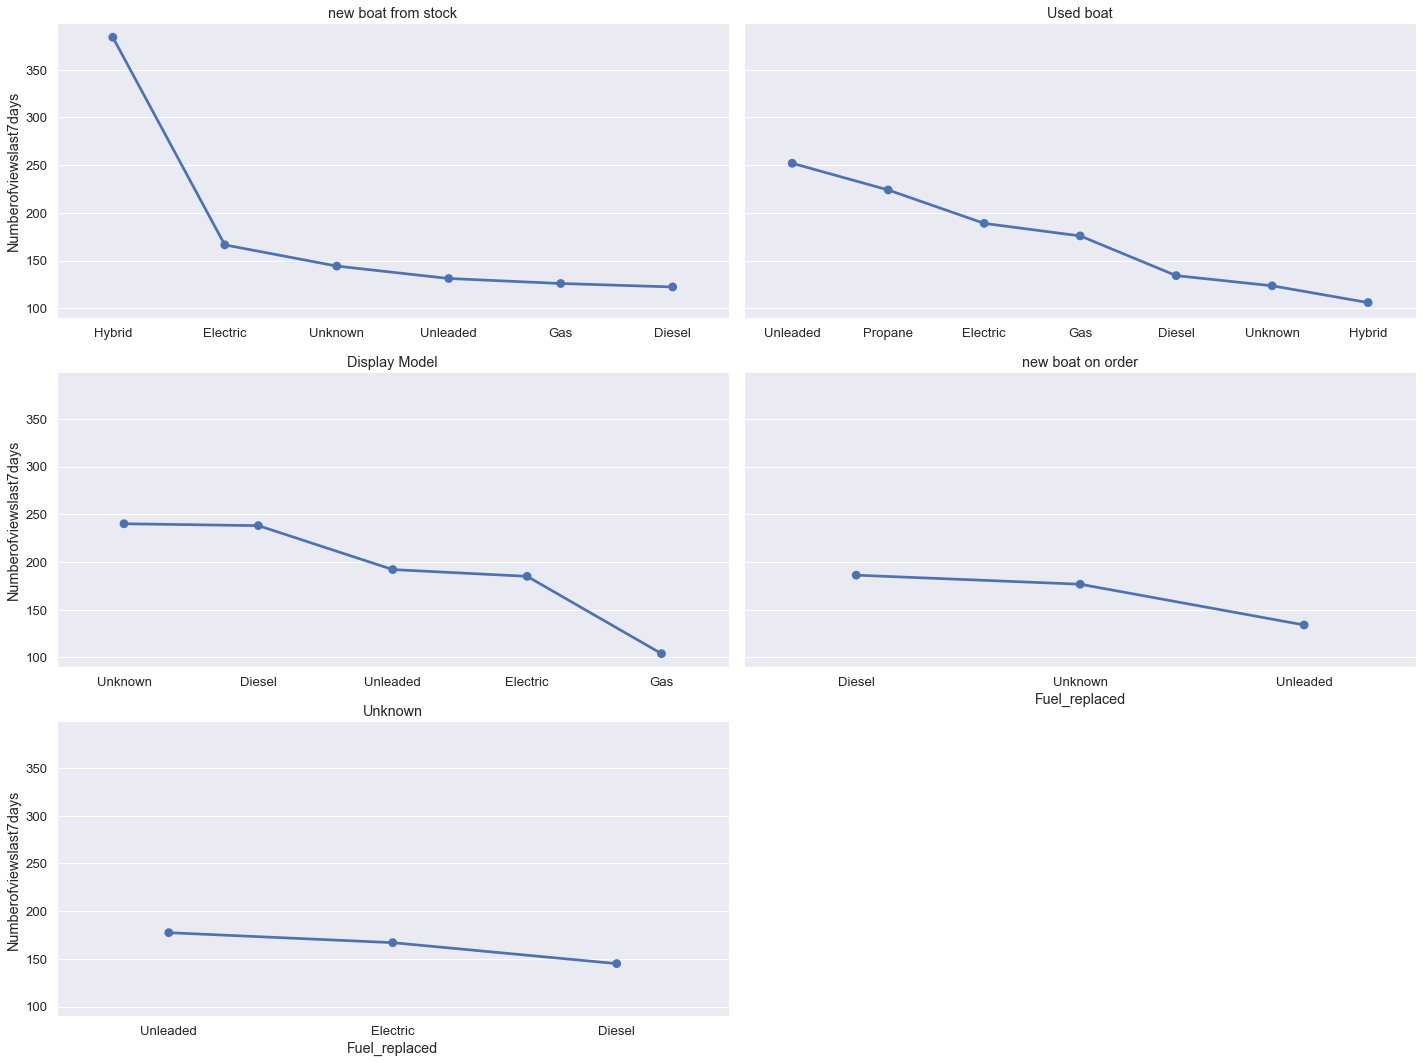

In [20]:
# visualizing the number of views for each fuel type and boat status from the partioned column
split_type = df.groupby(['BoatStatus',
                        'Fuel_replaced'])['Numberofviewslast7days'].mean().reset_index().\
                       sort_values('Numberofviewslast7days', ascending=False).reset_index(drop=True)
g = sns.catplot(x='Fuel_replaced', y='Numberofviewslast7days', data=split_type, kind='point', aspect=2, ci=False, col='BoatStatus',
           col_wrap=2, sharex=False, color='b')
g.set_titles(col_template='{col_name}')